## My initial question is: Who is the most popular artist and what makes him or her popular?

In [153]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
plt.rcParams["figure.figsize"] = (8,6)
import matplotlib
import matplotlib.patches as mpatches

In [154]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [155]:
# import data and see the format
data = pd.read_csv('A2-spotify.csv')
data.sample(3)

,release year,id,name,artists,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,popularity
20890,2005,2nuA1esWzYEgnfQ4DpsSsm,Dying in Your Arms,Trivium,0.753,0.000025,0.446,173160,0.933,0.000097,0.0850,-3.605,0.0537,159.961,50
394,2002,10CsMKlayFJOj4Lai9tAvm,You Are My Sunshine (Version 1),Elizabeth Mitchell,0.605,0.908000,0.477,168827,0.179,0.000458,0.2130,-17.071,0.0356,172.046,58
9903,2011,2klm6F6NIXGoqVbIkxKJPv,Comando X (En Vivo),"Tito Y Su Torbellino', 'Alfredo Olivas",0.878,0.235000,0.502,251747,0.858,0.000000,0.0979,-6.670,0.1010,167.129,58


Ok. Now I know that the data contains these following items: 
  - year
  - song id
  - song name
  - artists name
  - song's attributes
    - valence
    - acousticeness
    - danceability
    - duration in miliseconds
    - energy
    - instrumentalness
    - liveness
    - loudness
    - speechiness
    - tempo
  - song popularity score
  
Since the focus of this analysis is on artists. I'll first check whether there are missing values in the column of artists:

In [156]:
data[data.artists.isnull()]

,release year,id,name,artists,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,popularity


No. All rows contain artists information. 

## Q1: Who has the highest number of songs released (Top productive artists)

Before jumping into popularity, it's a good idea to look at the distribution of songs among all artists. 

First, let's check how many unique artists are there, and how many unique songs are there. 

In [157]:
unique_artists = list(set(data.artists))
len(unique_artists)

14762

In [158]:
len(list(set(data.id)))

39494

There are **close to 40K songs** made by more than **14K unique artists**. Then, what are the top artists in terms of number of songs released?

In [159]:
song_counts_df = data.groupby(['artists']).size().reset_index(
    name='counts').sort_values(by = 'counts', ascending = False)
song_counts_df.head(10)

,artists,counts
12239,Taylor Swift,207
1073,BTS,132
3964,Eminem,123
3592,Drake,122
8262,Mac Miller,106
7375,Lana Del Rey,95
9734,One Direction,95
6299,John Mayer,94
12988,The Weeknd,92
6761,Kanye West,88


Text(0.5, 0.0001, 'Distribution of umber of songs is heavyly skewed to the right, meaning that most of artists release very few songs.')

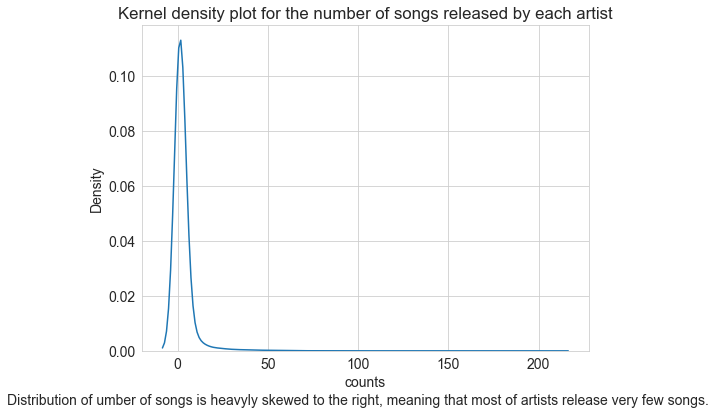

In [160]:
sns.set_style('whitegrid')
sns.kdeplot(song_counts_df.counts, bw_method=0.5).set_title(
    "Kernel density plot for the number of songs released by each artist")
txt="Distribution of umber of songs is heavyly skewed to the right, meaning that most of artists release very few songs."
plt.figtext(0.5, 0.0001, txt, wrap=True, horizontalalignment='center', fontsize=14)

The distribution has a very long tail. It shows that the majority of artists never release over 20 songs. 

## Q2: Distribution of popularity

Since the "target" of this analysis is popularity of songs. I want to first check how the popularity score is distributed. 

Text(0.5, 0.0001, 'Distribution of song popularity scores is not skewed (much). This means most songs have similar popularity scores (40-60)')

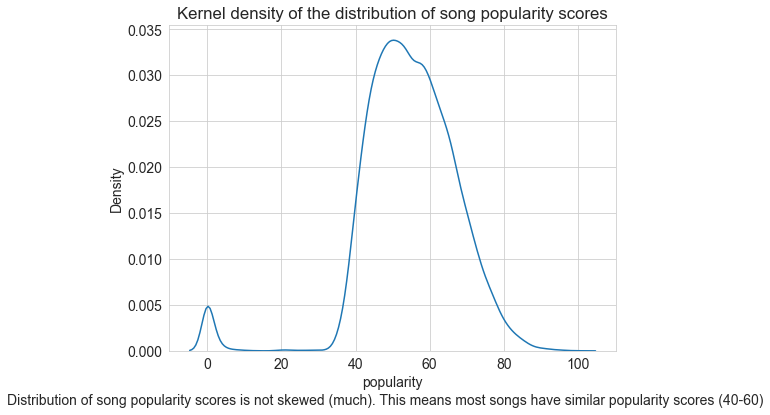

In [161]:
sns.kdeplot(data.popularity).set_title('Kernel density of the distribution of song popularity scores')
txt="Distribution of song popularity scores is not skewed (much). This means most songs have similar popularity scores (40-60)"
plt.figtext(0.5, 0.0001, txt, wrap=True, horizontalalignment='center', fontsize=14)

What the above plot shows is that most songs have a popularity score of 40-80. A few of have 0 popularity. 

## Q3: What the top songs in terms of popularity?

Given my initial question, I want to quick peak into the top songs in terms of popularity scores. 

In [162]:
top_popularity_df = data.sort_values(
    by='popularity', ascending=False).head(20)[['release year', 'id', 'name', 'artists', 'popularity']]

I found that the 19 out of the top 20 popular songs are relased in the year of 2020. So I am curious about whether `release year` has any impact on the popularity score. 

Then, I am curious, how many of the top 20 popular songs are made by the top 20 productive artists?

In [163]:
top_productive = song_counts_df.head(20)['artists'].tolist()
top_popular = top_popularity_df.artists.tolist()
[x for x in top_popular if x in top_productive]

['BTS', 'Ariana Grande', 'The Weeknd']

Only three! This means that only 3 out of the top 20 popular songs are produced by the top 20 most productive artists. 

## Q4: Release year

Like I said above, I want to see whether release year of a song has any impact on its score. The above list seems to indicate that recent songs are more popular. 

First, Let me check the distribution of `release year`. 

In [164]:
years = data['release year'].tolist()
dic = dict(Counter(years))
year_df = pd.DataFrame(dic.items(), columns = ['year', 'number of songs'])
year_df.sort_values(by='number of songs', ascending=False)

,year,number of songs
17,2018,2103
19,2020,2030
10,2011,2017
9,2010,2016
0,2001,2005
13,2014,2005
1,2002,2000
16,2017,1992
12,2013,1976
14,2015,1974


It seems that there isn't a clear temporal general trend in the number of songs released. But let me plot it to confirm my observation:

Text(0.5, 0.0001, 'Year and number of released songs are not correlated.')

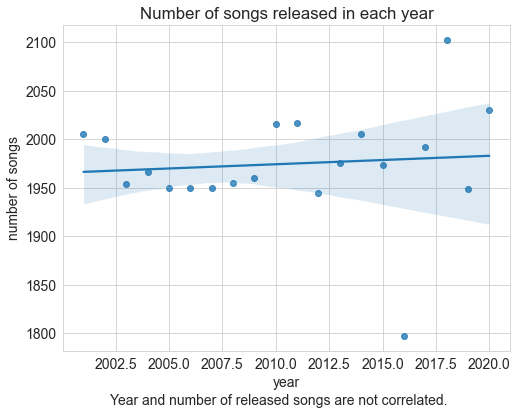

In [165]:
sns.regplot(x='year', y='number of songs', data = year_df).set_title(
    'Number of songs released in each year')
txt="Year and number of released songs are not correlated."
plt.figtext(0.5, 0.0001, txt, wrap=True, horizontalalignment='center', fontsize=14)

The above plot clearly shows that there isn't a temporal trend in the number of songs released. 

Then, I want to see whether the release year has any impact on the popularity score. This is very simple: for each song, or each row, I plot the `release year` and the `popularity`.

Text(0.5, 0.0001, 'Year and song popularity is slighly correlated: the more recent a song is, the more likely it is to be more popular.')

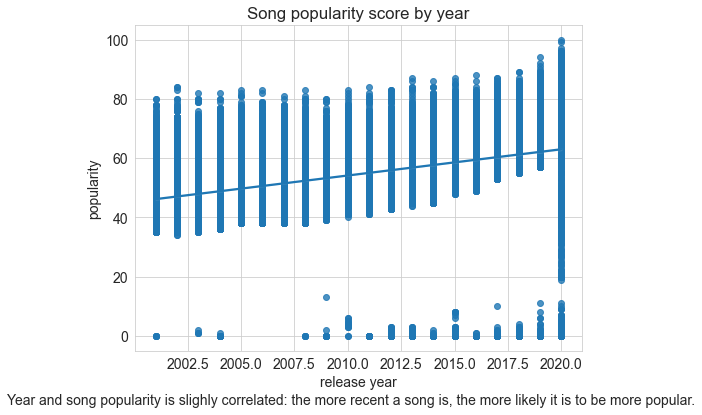

In [166]:
sns.regplot(x='release year', y='popularity', data = data).set_title('Song popularity score by year')
txt="Year and song popularity is slighly correlated: the more recent a song is, the more likely it is to be more popular."
plt.figtext(0.5, 0.0001, txt, wrap=True, horizontalalignment='center', fontsize=14)

It seems there is an upward trend: the more recent a song is, the higher its score of popularity. Let me check statistics:

In [167]:
data.corr().at['release year', 'popularity']

0.38880571219680504

It seems the correlation is not very strong. This indicates that **even though 19 out of 20 top popular songs are released in 2020, it does not mean that this is because of the year of 2020**. 

## Q5: How other attributes affect song popularity scores

Given that we have these song attributes:

    - valence
    - acousticeness
    - danceability
    - duration in miliseconds
    - energy
    - instrumentalness
    - liveness
    - loudness
    - speechiness
    - tempo
    
I am interested in how these attributes correlate with song popularity. 

In [168]:
corr_df = data[[
    'release year', 
    'valence', 
    'acousticness', 
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'popularity'
]]

Text(0.5, 1.0, 'Correlation heatmap of song attributes, release year, and song popularity')

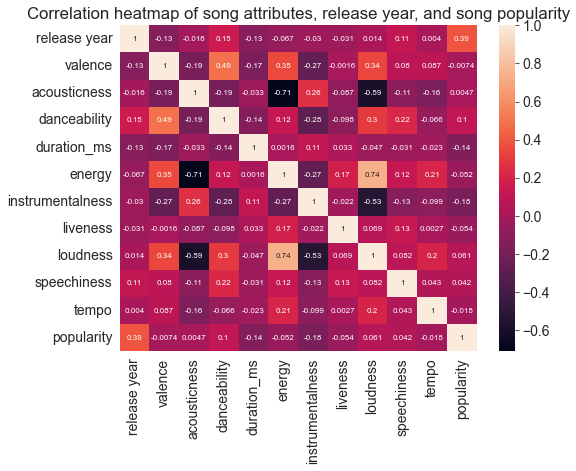

In [169]:
sns.heatmap(corr_df.corr(), annot=True, annot_kws={"size": 8}).set_title(
    'Correlation heatmap of song attributes, release year, and song popularity'
)

CAPTION: The above plot shows that none of the song attributes are correlated with song popularity. 

  ## Q6: analysis at the artists level
  
So far, I mostly analyzed the data at the song level. However, my key quetion is about artists, not songs. Therefore, I need to change the analysis level to artists in the following sections. 

In [170]:
df1 = data[[
    'artists',
    'valence', 
    'acousticness', 
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'popularity'
]]

What I want to do next is, for every artist, to get the mean of all these song attributes. I also want the number of songs that an artist has released. 

In [171]:
artists_mean_df = df1.groupby('artists').mean().reset_index()
artists_df = artists_mean_df.merge(song_counts_df, on='artists', how='outer')

Now, let's first look at who are the most popular artists. By "most popular", I mean whose songs, on average, get the highest popularity score. 

These are the top 20 popular artists:

In [172]:
artists_df.sort_values(by='popularity', ascending=False).head(20)[['artists', 'popularity', 'counts']]

,artists,popularity,counts
1121,"Bad Bunny', 'Jhay Cortez",100.0,1
73,"24kGoldn', 'iann dior",99.0,1
2109,"Cardi B', 'Megan Thee Stallion",96.0,1
6620,"Justin Bieber', 'benny blanco",95.0,1
6218,"Joel Corry', 'MNEK",94.0,1
11317,"Sech', 'Daddy Yankee', 'J Balvin', 'ROSAL√çA',...",94.0,1
10792,Ritt Momney,93.0,1
3613,"Drake', 'Lil Durk",93.0,1
7487,"Lele Pons', 'Guaynaa",92.0,1
13263,"Topic', 'A7S",92.0,1


Now, the data sounds weird to me: **All of the top 20 artists have only one song released in total**. Nonetheless, let's look at what attributes are correlated with their popularity. 

In [173]:
top_popular_artists = artists_df.sort_values(by='popularity', ascending=False).head(20)

Text(0.5, 1.0, 'Correlation heatmap of artists attributes, number of songs released, and artists popularity')

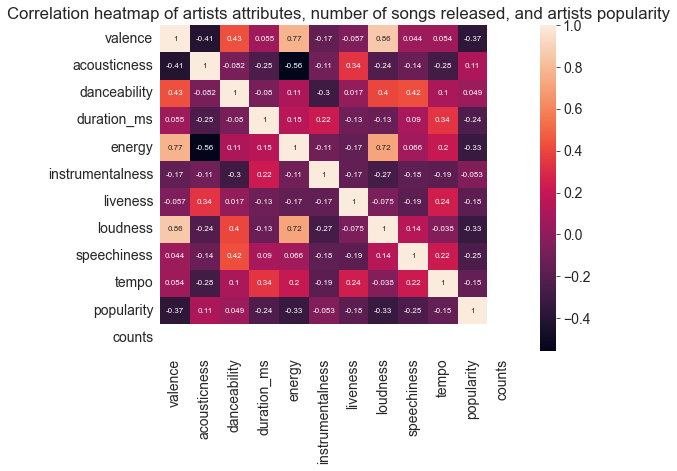

In [174]:
sns.heatmap(top_popular_artists.corr(), annot=True, annot_kws={"size": 8}).set_title(
    'Correlation heatmap of artists attributes, number of songs released, and artists popularity'
)

CAPTION: the plot shows that none of the attributes are correlated with the score, which is not surprising at all. Because, after all, these artists only have song each and above I have shown at the song level that song attributes are not correlated with song popularity. 

I want to see the correlations for top artists who have at least 2 songs released.

Text(0.5, 1.0, 'Correlation heatmap of artists attributes, number of songs released, and artists popularity')

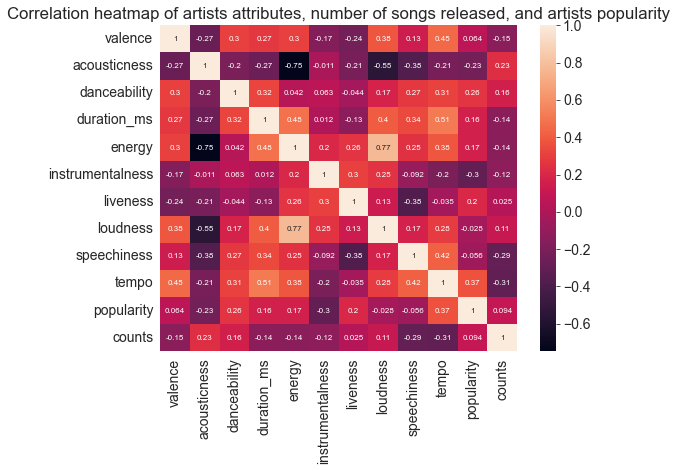

In [175]:
top_popular_artists_2 = artists_df[
    artists_df['counts'] > 1].sort_values(by='popularity', ascending=False).head(20)
sns.heatmap(top_popular_artists_2.corr(), annot=True, annot_kws={"size": 8}).set_title(
    'Correlation heatmap of artists attributes, number of songs released, and artists popularity'
)

CAPTION: no strong correlations exist. 

## Q7: Plot the attributes of top artists.

These are the attributes:

In [176]:
artists_df.columns[1:]

Index(['valence', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'popularity', 'counts'],
      dtype='object')

To plot the attributes of top artists, I need to plot the distribution of attributes for all artists first. 

Text(0.5, 0.001, ' Each curve in each subplot shows the distribution of a specific attributes for all artists. \n        ')

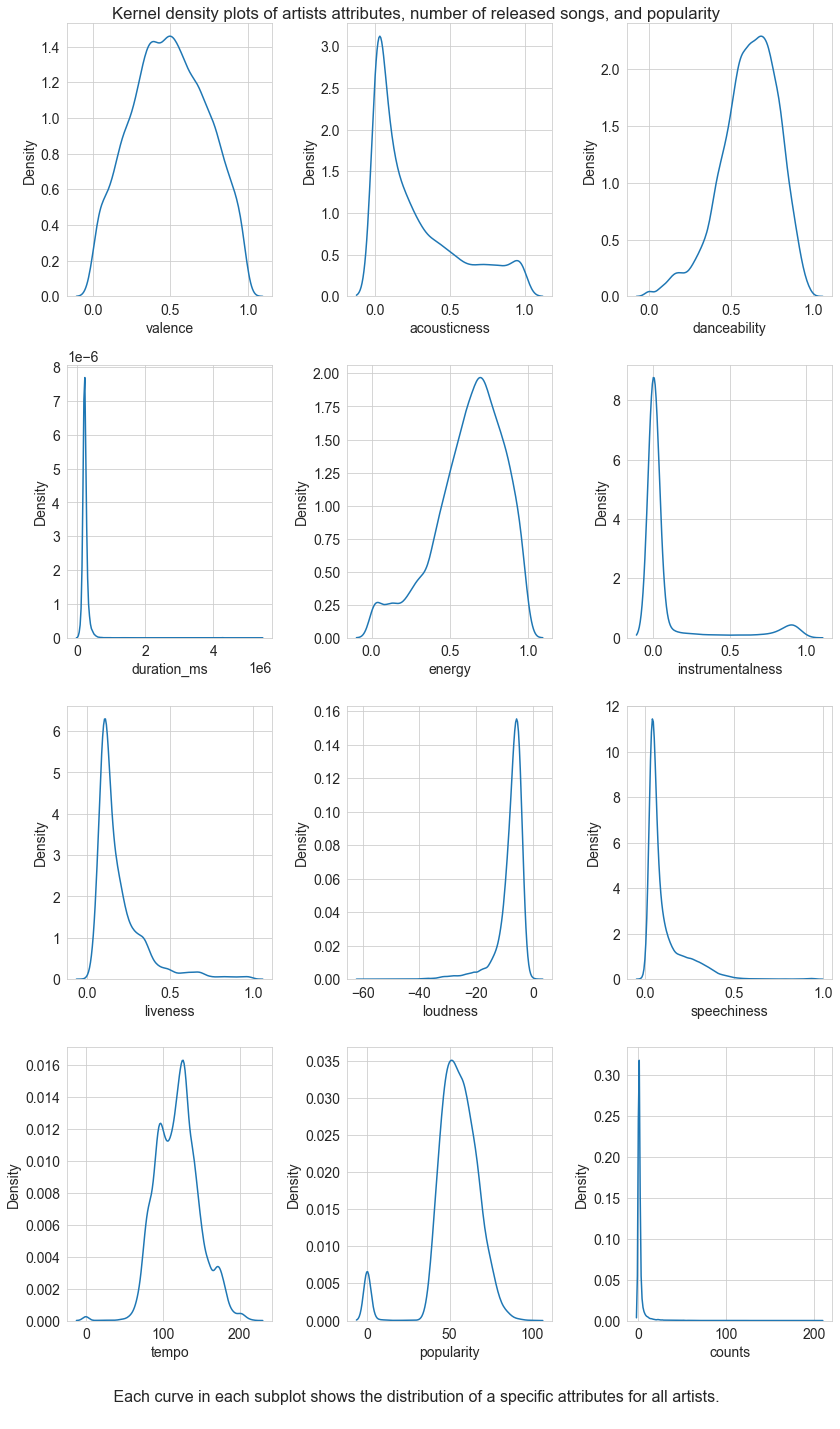

In [177]:
# snippet from https://stackoverflow.com/a/66932221/13716814
fig, axes = plt.subplots(nrows = 4, ncols = 3) 
axes = axes.flatten()
fig.set_size_inches(12, 20)
for ax, col in zip(axes, artists_df.columns[1:]):
  sns.kdeplot(artists_df[col], ax = ax)
fig.suptitle('Kernel density plots of artists attributes, number of released songs, and popularity')
fig.tight_layout(rect=[0, 0.03, 1, 1])
txt = """ Each curve in each subplot shows the distribution of a specific attributes for all artists. 
        """
plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center', fontsize=16)

The above plot is the dsitrubtion of all attributes for all artists. Then, I'll label top artists:

In [178]:
top_20_artists_dict = top_popular_artists.iloc[:, 1:].mean().to_dict()
top_20_artists_2_dict = top_popular_artists_2.iloc[:, 1:].mean().to_dict()

Text(0.5, 0.001, ' Each curve in each subplot shows the distribution of a specific attributes for all artists. \n            Red pointers denote the attribute for the top 20 popular artists for each attribute. \n            Yellow pointers denote the attribute for the top 20 popular artists for each attribute. \n        ')

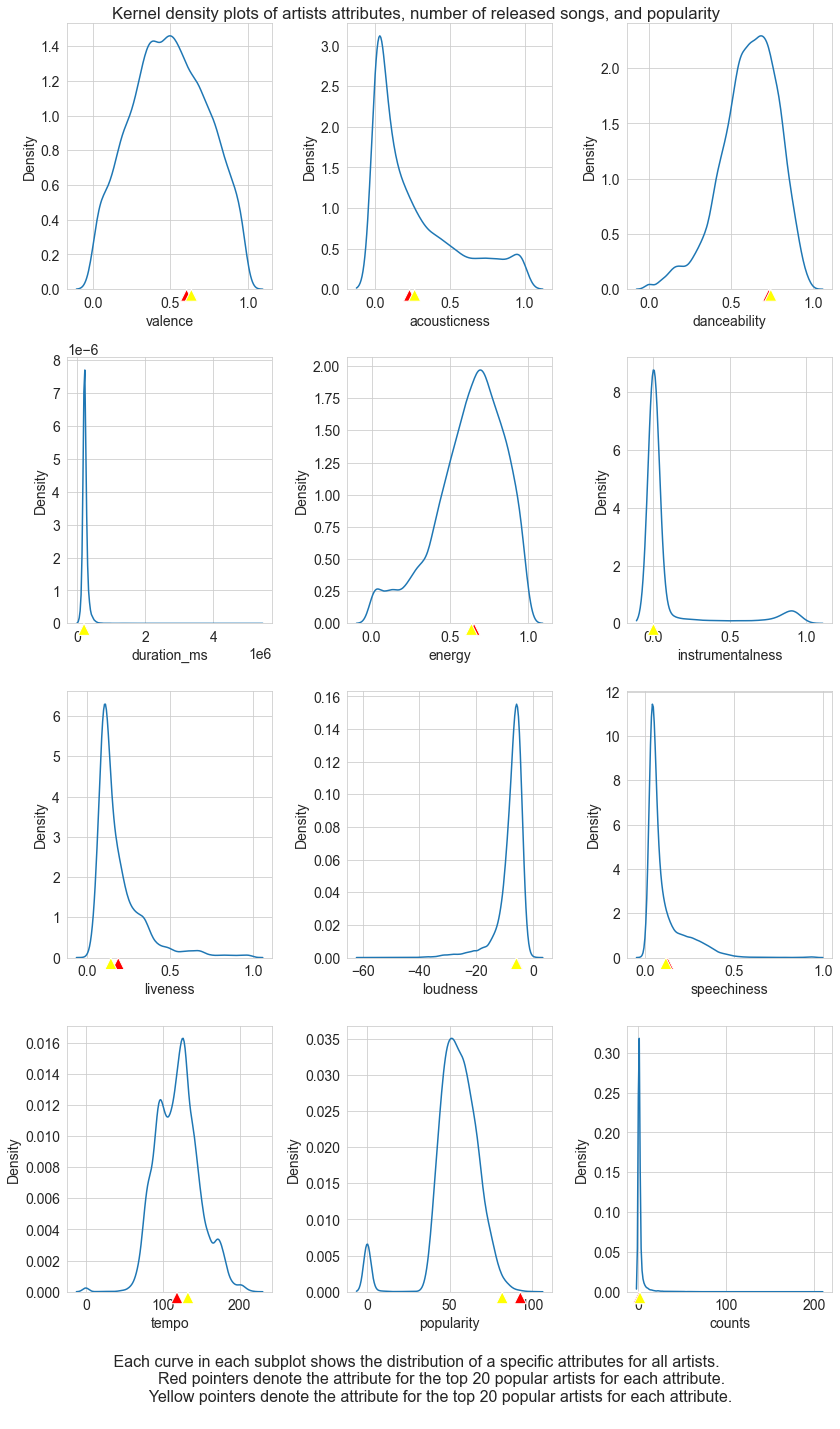

In [179]:
# snippet from https://stackoverflow.com/a/66932221/13716814
fig, axes = plt.subplots(nrows = 4, ncols = 3) 
axes = axes.flatten()
fig.set_size_inches(12, 20)
for ax, col in zip(axes, artists_df.columns[1:]):
    sns.kdeplot(artists_df[col], ax = ax)
    ax.annotate(' ', xy=(top_20_artists_dict[col], 0), xytext=(top_20_artists_dict[col], 0),
            arrowprops=dict(facecolor='red',
                           ))
    ax.annotate(' ', xy=(top_20_artists_2_dict[col], 0), xytext=(top_20_artists_2_dict[col], 0),
            arrowprops=dict(facecolor='yellow',
                           ))
fig.suptitle('Kernel density plots of artists attributes, number of released songs, and popularity')
fig.tight_layout(rect=[0, 0.05, 1, 1])
txt = """ Each curve in each subplot shows the distribution of a specific attributes for all artists. 
            Red pointers denote the attribute for the top 20 popular artists for each attribute. 
            Yellow pointers denote the attribute for the top 20 popular artists for each attribute. 
        """
plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center', fontsize=16)

I'll want legends:

Text(0.5, 0.001, ' Each curve in each subplot shows the distribution of a specific attributes for all artists. \n            Red pointers denote the attribute for the top 20 popular artists for each attribute. \n            Yellow pointers denote the attribute for the top 20 popular artists for each attribute. \n        ')

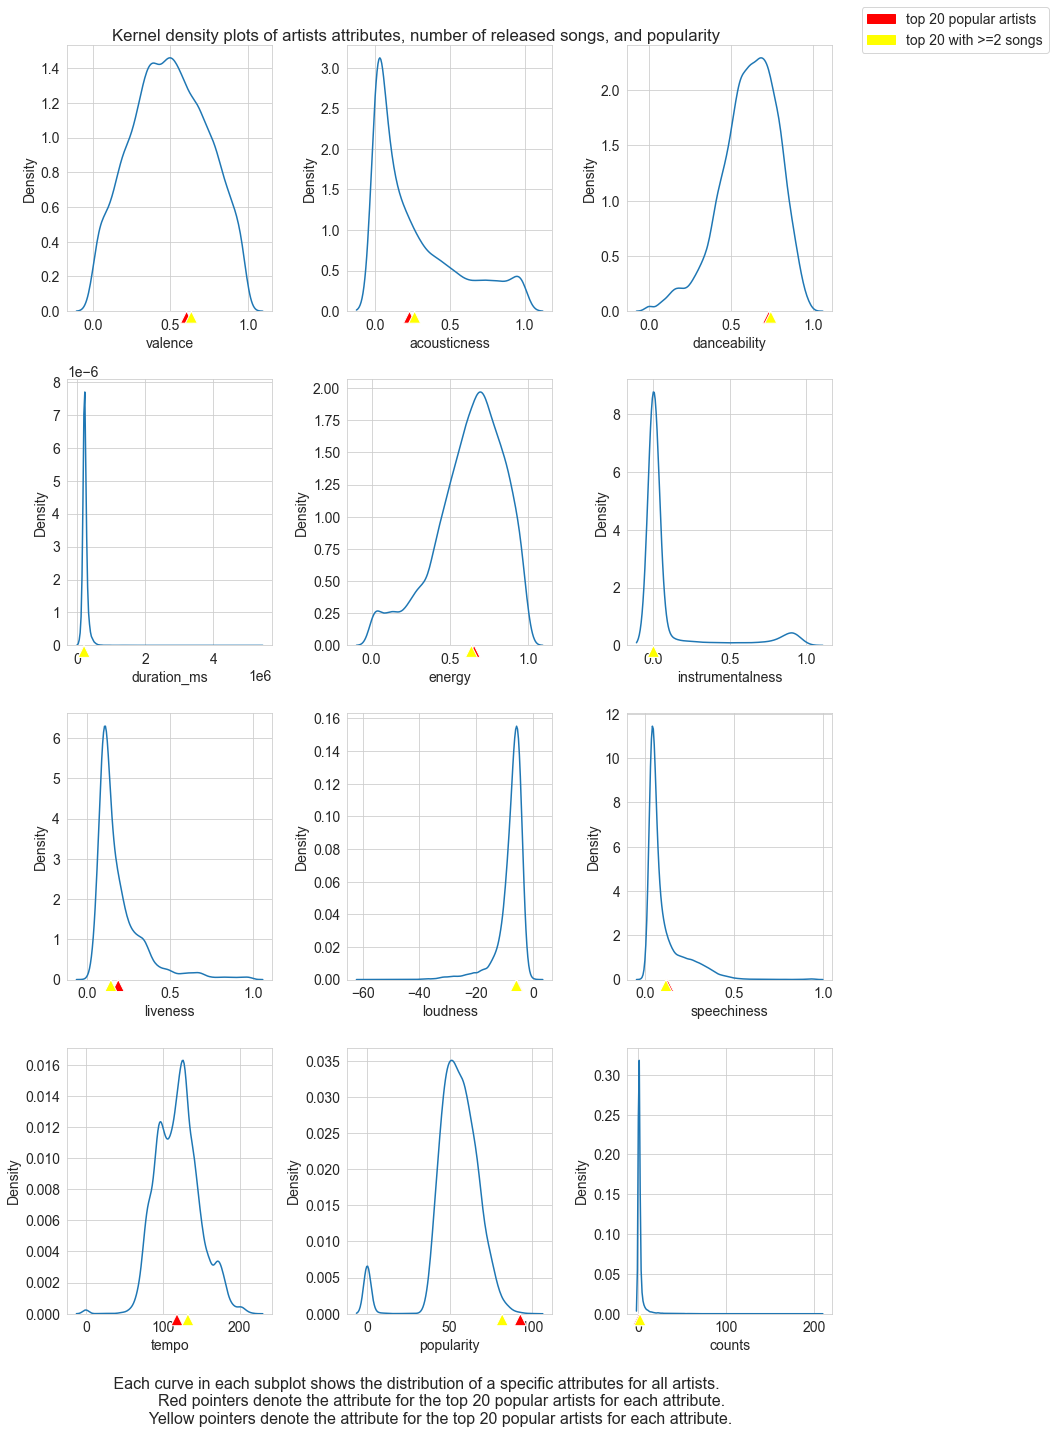

In [180]:
# snippet from https://stackoverflow.com/a/66932221/13716814
fig, axes = plt.subplots(nrows = 4, ncols = 3) 
axes = axes.flatten()
fig.set_size_inches(12, 20)
for ax, col in zip(axes, artists_df.columns[1:]):
    sns.kdeplot(artists_df[col], ax = ax)
    ax.annotate(' ', xy=(top_20_artists_dict[col], 0), xytext=(top_20_artists_dict[col], 0),
            arrowprops=dict(facecolor='red',
                           ))
    ax.annotate(' ', xy=(top_20_artists_2_dict[col], 0), xytext=(top_20_artists_2_dict[col], 0),
            arrowprops=dict(facecolor='yellow',
                           ))
fig.suptitle('Kernel density plots of artists attributes, number of released songs, and popularity')
fig.tight_layout(rect=[0, 0.05, 1, 1])
red_patch = mpatches.Patch(color='red', label='top 20 popular artists')
blue_patch = mpatches.Patch(color='yellow', label='top 20 with >=2 songs')

fig.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(1.24,1), loc="upper right")
txt = """ Each curve in each subplot shows the distribution of a specific attributes for all artists. 
            Red pointers denote the attribute for the top 20 popular artists for each attribute. 
            Yellow pointers denote the attribute for the top 20 popular artists for each attribute. 
        """
plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center', fontsize=16)

What the above figure shows is that for the top artists, their attributes are arund the average or median of all artists. They are not qualititively different from other artists. 

My initial question is: what makes popular artists popular. What the above plot tells me is that top popular artists do not differ qualitatively from unpopular artists. 

## Main lessons learned

In terms of the data itself, I learned that song, or artists popularity might just be an arbitrary thing. In terms of the process of exploratory data analysis, I learned that having a main question in mind before starting the actual analysis helps a lot. 

## How EDA helps modeling user experiences

EDA helps modeling user experiences because by doing it, the deverlopers will get a deeper sense of what the data really looks like. Keep in mind that the data is what the uers will interact with, either directly or indirectly. Getting a deeper sense of the data will help the developer know the best way to arrange and present data for the user. 